In [43]:
import jax.numpy as jnp
from jax import random as jrandom
import matplotlib.pyplot as plt
import new_adventure as na

%load_ext autoreload
%autoreload 2

%matplotlib inline
plt.rcParams['figure.figsize'] = [16,8]
plt.style.use('ggplot')
plt.rcParams['lines.markersize'] = 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


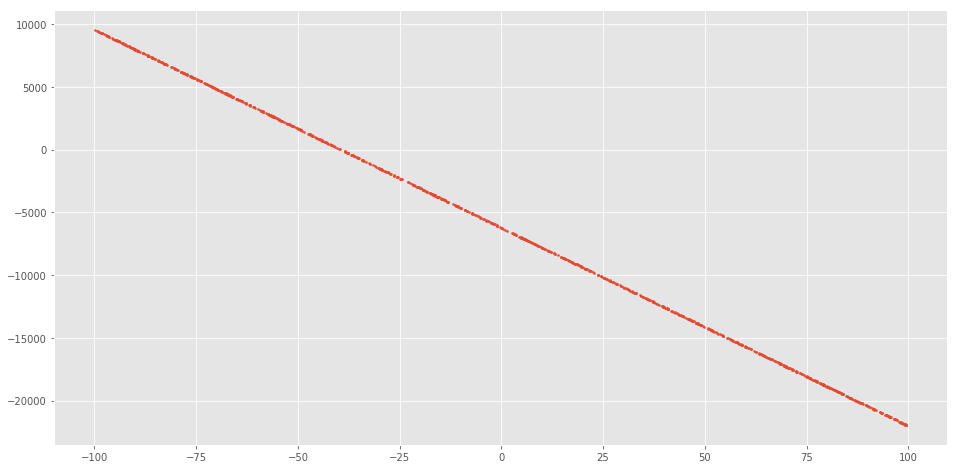

In [91]:
domain = [-10, 10]

# class Tesselated:
#     def __init__(self, func, N, domain, jrandom_key):
#         self.func = func
#         self.N = N
#         self.domain = domain
#         self.jrandom_key = jrandom_key
#         self.jrandom_key, subkey = jrandom.split(self.jrandom_key)
#         S = jrandom.uniform(subkey, shape=(self.N, domain["dim"]), minval=domain["bound"][0], maxval=domain["bound"][1])
#         self.m = func.f1(S)
#         self.b = func.f(S) - jnp.sum(self.m * S, axis=1) # we have y = f + grad (x - x_0) = f - grad x_0 + grad x
                    
#     def f(self, X):
#         return jnp.max(self.b + X.dot(self.m.T), axis=1)
    
#     def f_all(self, X):
#         """For ploting:
#         out_all = t.f_all(X)
#         for x in out_all.T:
#             plt.scatter(X, x)"""
#         return self.b + X.dot(self.m.T)

domain = {"dim": 1, "bound": [-100, 100]}
jrandom_key = jrandom.PRNGKey(0)
jrandom_key, subkey = jrandom.split(jrandom_key)

t = na.Functions.Tesselated(na.Functions.Quadratic(jnp.eye(domain["dim"]), jnp.zeros(domain["dim"])), 1, domain, subkey)

jrandom_key, subkey = jrandom.split(jrandom_key)
X = jrandom.uniform(subkey, shape=(1000, domain["dim"]), minval=domain["bound"][0], maxval=domain["bound"][1])
out = t.f(X)
plt.scatter(X, out)
# out_all = t.f_all(X)
# for x in out_all.T:
#     plt.scatter(X, x)
               

In [75]:
def f(func, X, jrandom_key, sigma, N):
    d = X.shape[1]
    cov = sigma**2*jnp.eye(d)
    jrandom_key, subkey = jrandom.split(jrandom_key)
    x_samples = jrandom.multivariate_normal(key=subkey, mean=X, cov=cov, shape=(N, len(X), )).transpose(1, 0, 2)
    f_out = func.f(x_samples.reshape(-1, d)).reshape(len(X), N)
    return x_samples, jnp.mean(f_out, axis=1)

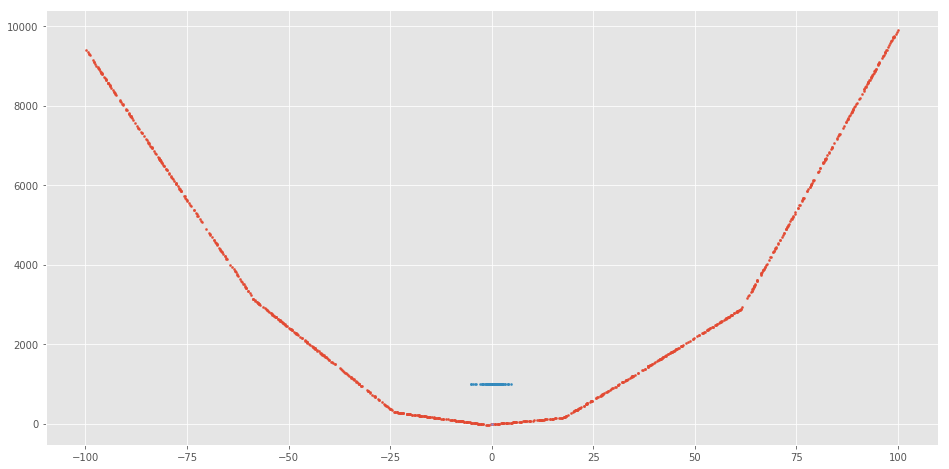

In [87]:
X = jrandom.uniform(subkey, shape=(1000, domain["dim"]), minval=domain["bound"][0], maxval=domain["bound"][1])
out = t.f(X)

sigma = 2
num_samples = 100
x_try = jnp.zeros(shape=(1, domain["dim"]))

jrandom_key, subkey = jrandom.split(jrandom_key)
x_samples, x_out = f(t, x_try, subkey, sigma, num_samples)
    
plt.scatter(X, out)
plt.scatter(x_samples, 1000*jnp.ones(num_samples))
plt.scatter(x_try, x_out)

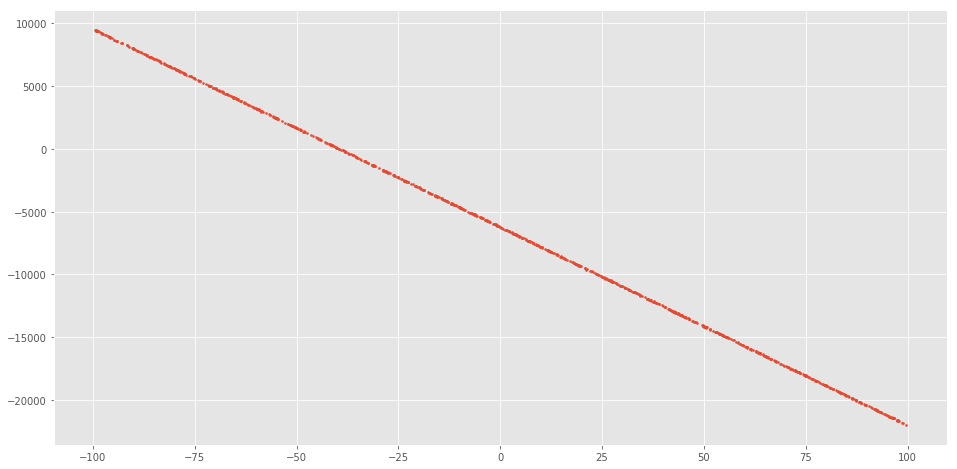

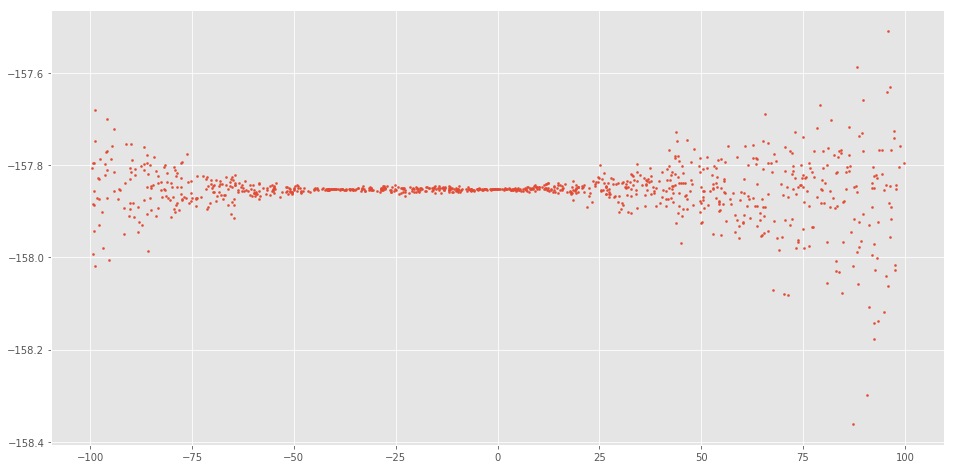

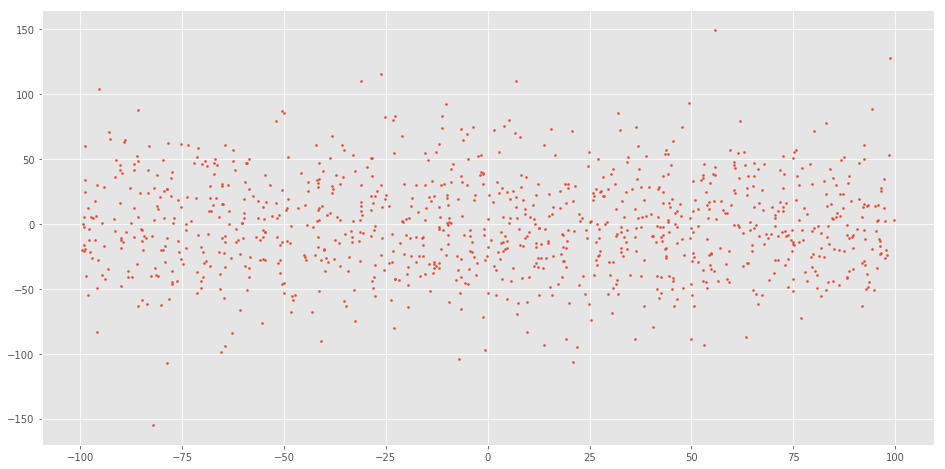

In [108]:
sigma = 1
num_samples = 100

g = na.Functions.GaussianSmoothing(t, num_samples, sigma)
jrandom_key, subkey = jrandom.split(jrandom_key)
X = jrandom.uniform(subkey, shape=(1000, domain["dim"]), minval=domain["bound"][0], maxval=domain["bound"][1])

jrandom_key, subkey = jrandom.split(jrandom_key)
out = g.f(X, subkey, sigma)
plt.scatter(X, out)
plt.show()

jrandom_key, subkey = jrandom.split(jrandom_key)
out = g.f1(X, subkey, sigma)
plt.scatter(X, out)
plt.show()

jrandom_key, subkey = jrandom.split(jrandom_key)
out = g.f2(X, subkey, sigma)
plt.scatter(X, out)
plt.show()

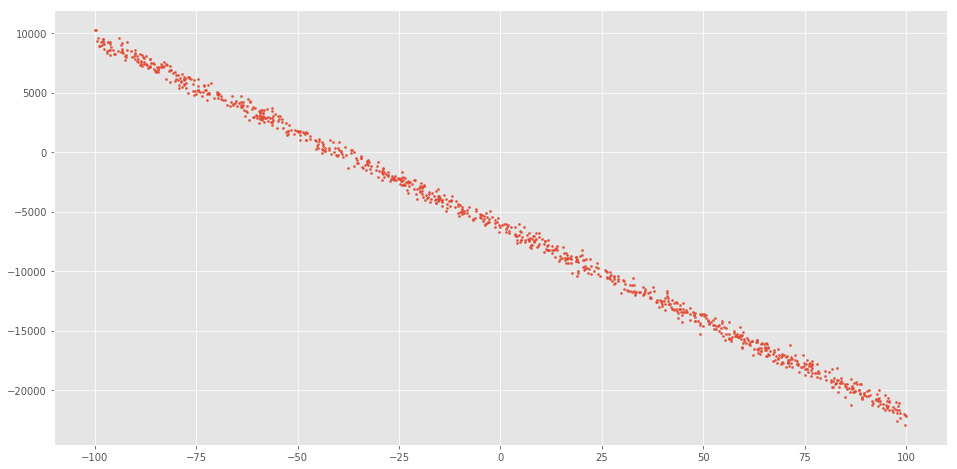

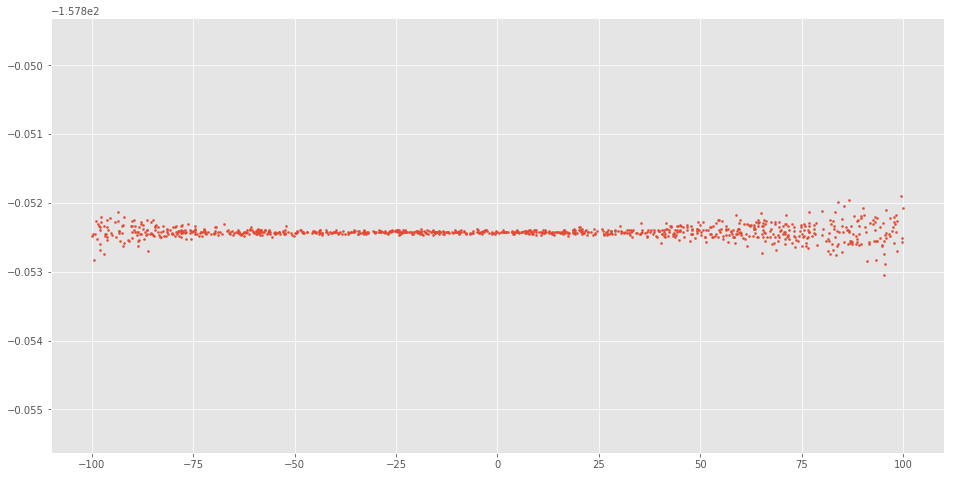

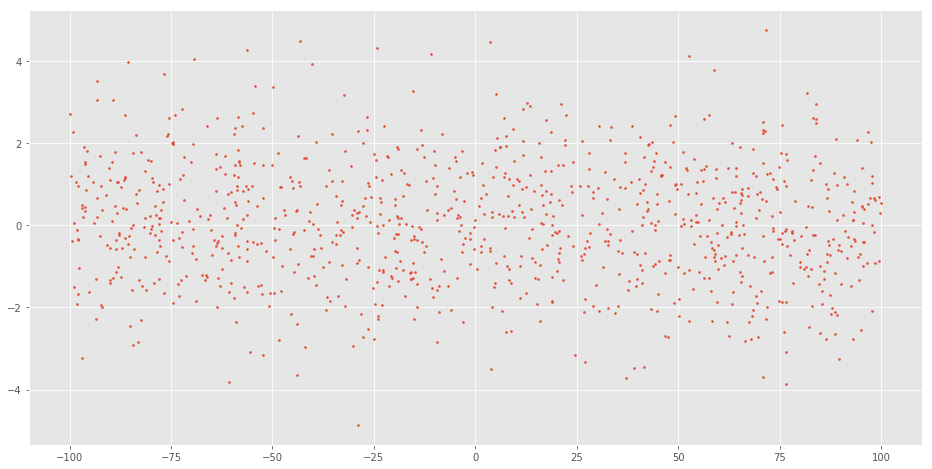

In [110]:
sigma = 25
num_samples = 100

g = na.Functions.GaussianSmoothing(t, num_samples, sigma)
jrandom_key, subkey = jrandom.split(jrandom_key)
X = jrandom.uniform(subkey, shape=(1000, domain["dim"]), minval=domain["bound"][0], maxval=domain["bound"][1])

jrandom_key, subkey = jrandom.split(jrandom_key)
out = g.f(X, subkey, sigma)
plt.scatter(X, out)
plt.show()

jrandom_key, subkey = jrandom.split(jrandom_key)
out = g.f1(X, subkey, sigma)
plt.scatter(X, out)
plt.show()

jrandom_key, subkey = jrandom.split(jrandom_key)
out = g.f2(X, subkey, sigma)
plt.scatter(X, out)
plt.show()

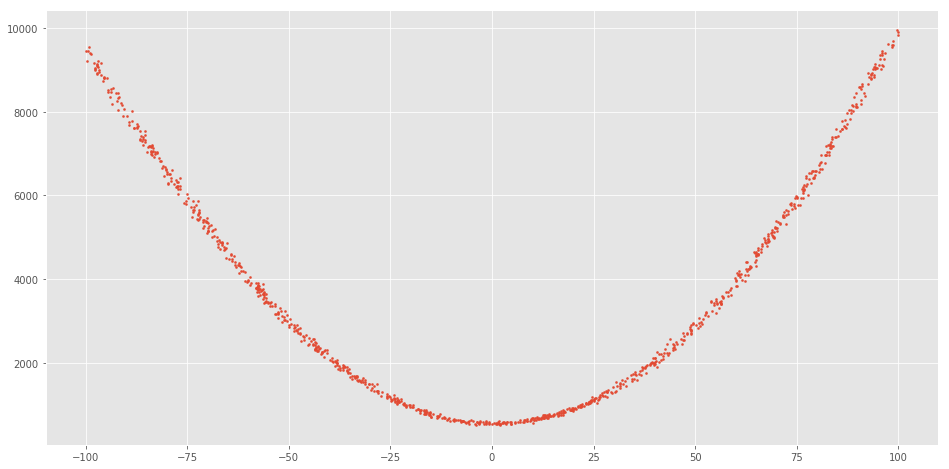

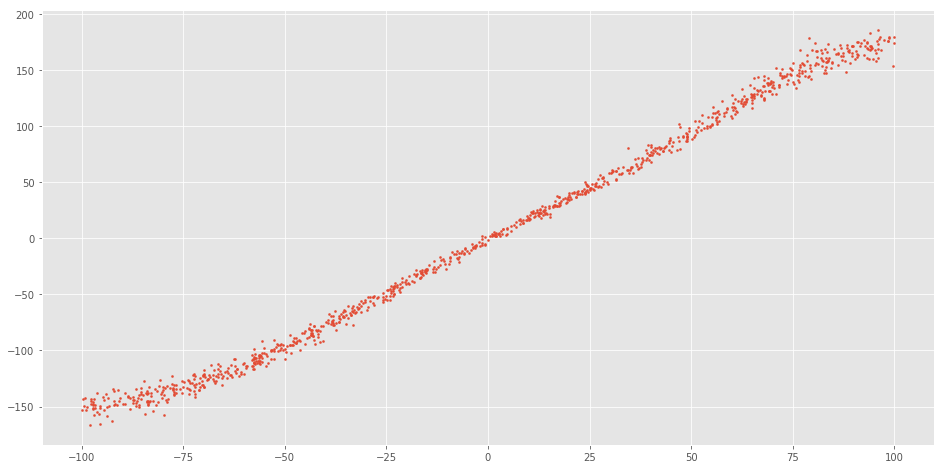

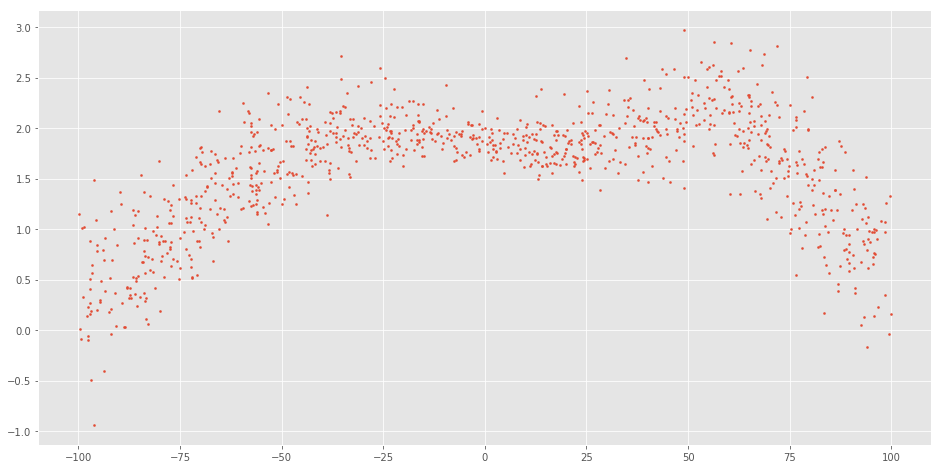

In [69]:
sigma = 25
num_samples = 100
g = na.Functions.GaussianSmoothing(t, num_samples, sigma)
jrandom_key, subkey = jrandom.split(jrandom_key)
X = jrandom.uniform(subkey, shape=(1000, domain["dim"]), minval=domain["bound"][0], maxval=domain["bound"][1])

jrandom_key, subkey = jrandom.split(jrandom_key)
out = g.f(X, subkey, sigma)
plt.scatter(X, out)
plt.show()

jrandom_key, subkey = jrandom.split(jrandom_key)
out = g.f1(X, subkey, sigma)
plt.scatter(X, out)
plt.show()

jrandom_key, subkey = jrandom.split(jrandom_key)
out = g.f2(X, subkey, sigma)
plt.scatter(X, out)
plt.show()

In [289]:
jrandom_key, subkey = jrandom.split(jrandom_key)
N  = 10000
sigma = 10 
x_samples = jrandom.multivariate_normal(key=subkey, mean=jnp.array([20]), cov=sigma**2 * jnp.array([[1]]), shape=(N, ))#.reshape(-1)

f_out = 100 * x_samples

x_diff = x_samples - jnp.mean(x_samples)
cov_inv = jnp.linalg.inv(x_diff.T.dot(x_diff) / N)
print(cov_inv)
print(jnp.mean(x_samples))

print(cov_inv[0][0] * (x_diff.T * f_out.reshape(-1)).dot(x_diff).dot(cov_inv))
print(cov_inv * jnp.sum(f_out))
print(jnp.mean(f_out))
print(cov_inv)

( (x_diff.T * f_out.reshape(-1)).dot(x_diff).dot(cov_inv) - jnp.sum(f_out) ) / (sigma**2 * N )


[[0.010136]]
19.981207
[[203567.97]]
[[202529.64]]
1998.1215
[[0.010136]]


DeviceArray([[0.10244]], dtype=float32)

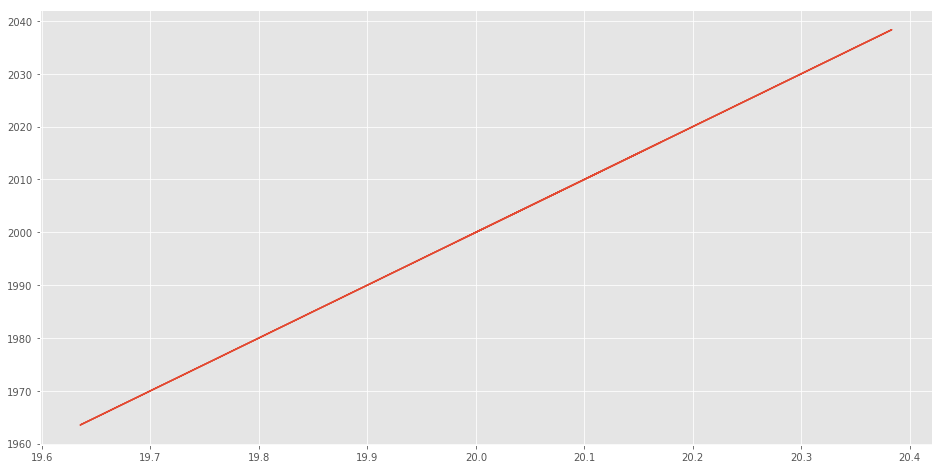

In [248]:
plt.plot(x_samples, f_out)

We have $\int f(x) \Sigma^{-1} (x - x_0) e^{ - (x - x_0)^T \Sigma^{-1} (x - x_0) / 2} dx $. Now the second derivative is:
$\int f(x) \Sigma^{-1} (-1)  e^{ - (x - x_0)^T \Sigma^{-1} (x - x_0) / 2} + f(x)\Sigma^{-1} (x - x_0)(x - x_0)^T \Sigma^{-1}  e^{ - (x - x_0)^T \Sigma^{-1} (x - x_0) / 2} dx$

In [113]:
bounds = [-10, 10]
num_samples = 100

X = jnp.linspace(bounds[0], bounds[1], num_samples)
XY = jnp.array(jnp.meshgrid(X, X)).T.reshape(-1, 2) # .reshape(-1, 2)
print(XY.shape)

jrandom_key = jrandom.PRNGKey(0)
sigma = 1
smoothing = na.Functions.GaussianSmoothing(na.Functions.MAXQ(), 100, sigma)


out = smoothing.f(XY, jrandom_key, sigma ).reshape(num_samples, num_samples, )


(10000, 2)


In [114]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Surface(x=X, y=X, z=out,)]) #Surface

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [14]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Scatter3d(x=XY[:, 0], y=XY[:, 1], z=out.reshape(-1), mode='markers')]) #Surface

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()